# Decorators
- Basically functions that are passed functions to return functions
- ????
 

In [14]:
def says_something(name, message):
    return f"{name}: {message}"


def says_something_confusing(func, *args, **kwargs):
    return func(*args, **kwargs) + "... I think, but idk."


In [15]:
says_something("Paul", "I think I will go to the mall")

'Paul: I think I will go to the mall'

In [16]:
says_something_confusing(says_something, "Paul", "I think I will go to the mall")

'Paul: I think I will go to the mall... I think, but idk.'

# Args and Kwargs

-  sometimes we want to pass as many arguments or keyword arguments as possible to the function and handle all of them

In [20]:
def add(*args):
    s = 0
    for arg in args:
        s += arg 
    return s

add(1, 2, 3, 123123, 111)

123240

In [21]:
def print_as_dict(**kwargs):
    for key in kwargs:
        print(f"{key}: {kwargs[key]}")
        
print_as_dict(
    key1="val1",
    key2="val2",
    key3="val3",
)

key1: val1
key2: val2
key3: val3


# Back to decorators

In [22]:
def says_something(name, message):
    return f"{name}: {message}"


def confuse_it(f):
    
    def new_f(*args, **kwargs):
        return f(*args, **kwargs) + "... I think, but idk."

    return new_f

In [25]:
@confuse_it
def says_something(name, message):
    return f"{name}: {message}"

says_something("Erica", "I will be going to LA")

'Erica: I will be going to LA... I think, but idk.'

# A logging decorator

In [28]:
f = np.sum 
f.__name__

'sum'

In [36]:

def log(f):
    logfile = "logs.txt"
    def new_f(*args, **kwargs):
        with open(logfile, "a") as handle:
            handle.write(f"Called function {f.__name__} with args: {args} and kwargs: {kwargs}\n")
        return f(*args, **kwargs)
        
    return new_f

In [38]:
@log
def add(a, b):
    return a+b

add(2, 1)    

3

In [39]:
import numpy as np
import matplotlib.pyplot as plt

@log
def koch_snowflake(order, scale=10, figsize=(8, 8), dpi=300):
    """
    Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    plt.figure(figsize=figsize, dpi=dpi)
    plt.axis('equal')
    plt.fill(x, y)
    plt.show()

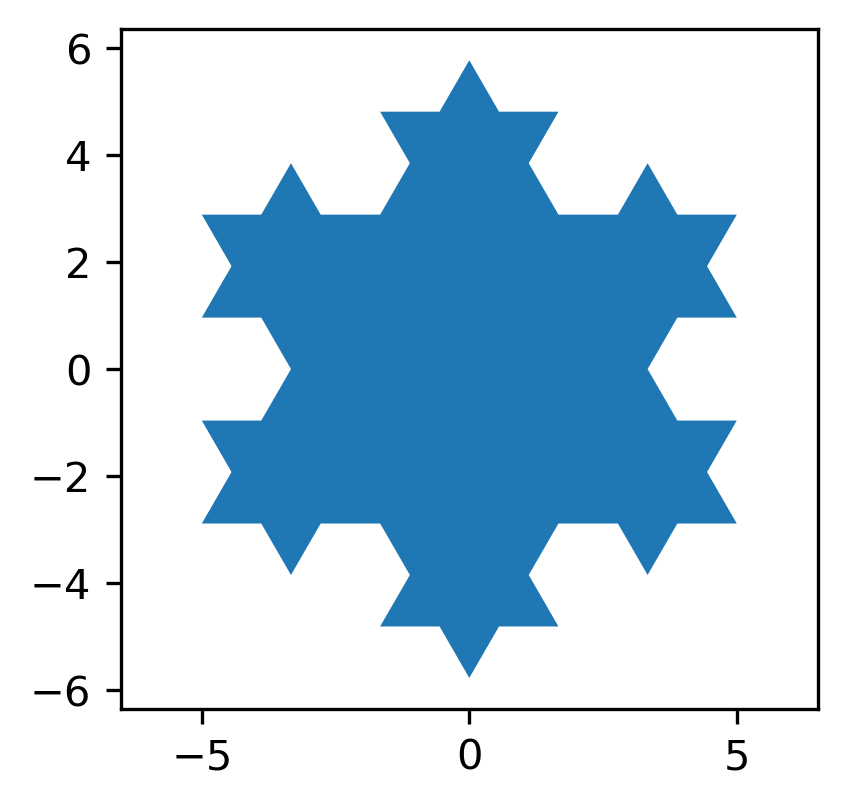

In [41]:
koch_snowflake(2, scale=10, figsize=(3, 3), dpi=300)